In [5]:
from pathlib import Path
import h5py
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

BASE = Path.cwd().parent.parent / 'WikiData.nosync'


## Load embeddings and check for missing values
This block loads the HDF5 database containing the embeddings and ensures there are no missing values for the year of death.

In [2]:
h5_path = BASE / 'people_embeddings_death10k.h5'
with h5py.File(h5_path, 'r') as h5:
    embeddings = h5['embeddings'][:]
    qids = h5['qids'][:].astype(str)
    dod_year = h5['dod_year'][:]

mask = ~np.isnan(dod_year)
print('Missing years:', np.sum(~mask))
embeddings = embeddings[mask]
qids = qids[mask]
dod_year = dod_year[mask]


Missing years: 0


## Split into train, validation and test sets
Adjust the fractions below to control how much data goes into each split.

In [3]:
train_frac = 0.7
val_frac = 0.15
test_frac = 0.15

X_temp, X_test, y_temp, y_test = train_test_split(
    embeddings, dod_year, test_size=test_frac, random_state=42)
val_ratio = val_frac / (train_frac + val_frac)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_ratio, random_state=42)


## Baseline Linear Regression
Fit a simple linear regression model and evaluate it on the validation and test sets.

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)
val_pred = lr.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)
print(f'Validation MSE: {val_mse:.2f}')

test_pred = lr.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
print(f'Test MSE: {test_mse:.2f}')


Validation MSE: 8349.04
Test MSE: 4065.52


Scatter plot of the linear regression

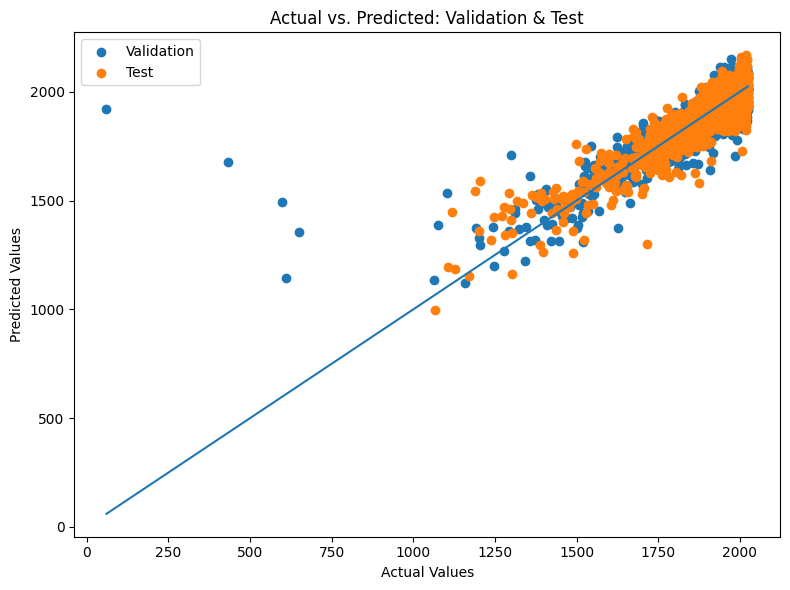

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, val_pred, label='Validation')
plt.scatter(y_test, test_pred, label='Test')

# Reference line y = x
min_val = min(np.min(y_val), np.min(y_test))
max_val = max(np.max(y_val), np.max(y_test))
plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted: Validation & Test')
plt.legend()
plt.tight_layout()
plt.show()